In [1]:
import pandas as pd
import os
import torch

In [2]:
dataset_dir = "/nas/public/dataset/LibriSpeech"
txt_path = "/nas/home/fcastelli/asr/dataset/librispeech/texts/train.txt"

train_dir_1 = os.path.join(dataset_dir, "train-clean-100")
train_dir_2 = os.path.join(dataset_dir, "train-clean-360")

In [3]:
df = pd.read_csv(txt_path, delimiter=' ', header=None, dtype='object')
df.columns = ['speaker_id', 'chapter_id', 'audio_id', 'seq', 'dataset']

In [4]:
print(df)

       speaker_id chapter_id audio_id  \
0             374     180298     0000   
1             374     180298     0001   
2             374     180298     0002   
3             374     180298     0003   
4             374     180298     0004   
...           ...        ...      ...   
132548       2920     156230     0042   
132549       2920     156230     0043   
132550       2920     156230     0044   
132551       2920     156230     0045   
132552       2920     156230     0046   

                                                      seq          dataset  
0       CHAPTER SIXTEEN I MIGHT HAVE TOLD YOU OF THE B...  train-clean-100  
1       MARGUERITE TO BE UNABLE TO LIVE APART FROM ME ...  train-clean-100  
2       I WISHED ABOVE ALL NOT TO LEAVE MYSELF TIME TO...  train-clean-100  
3       ASSUMED ALL AT ONCE AN APPEARANCE OF NOISE AND...  train-clean-100  
4       NOTHING IS SO EXPENSIVE AS THEIR CAPRICES FLOW...  train-clean-100  
...                                          

## Front-end and tokenizer

In [5]:
from models.las.tokenizer import Tokenizer
from models.las.dataset import LibriSpeechDataset
from frontends.melspectrogram import MelSpectrogram
from frontends.mfccs import MFCCs

import torchaudio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display

In [6]:
tokenizer = Tokenizer()
dataset = LibriSpeechDataset(df, dataset_dir, tokenizer)
loader = torch.utils.data.DataLoader(dataset, shuffle=False, num_workers=0, batch_size=1)

it = iter(loader)

In [7]:
sr=16000
win_len=int(round(sr*0.025))
hop_len=int(round(sr*0.010))
n_fft = 2 ** int(np.ceil(np.log(win_len) / np.log(2.0)))

frontend = MelSpectrogram(sr=16000, n_mfcc=40, dct_type=2, norm=None, n_fft=n_fft, win_len=win_len, hop_len=hop_len, 
                    f_min=20, f_max=7500, pad=0, n_mels=64, window_fn=torch.hann_window, power=1, normalized=False)

14.53


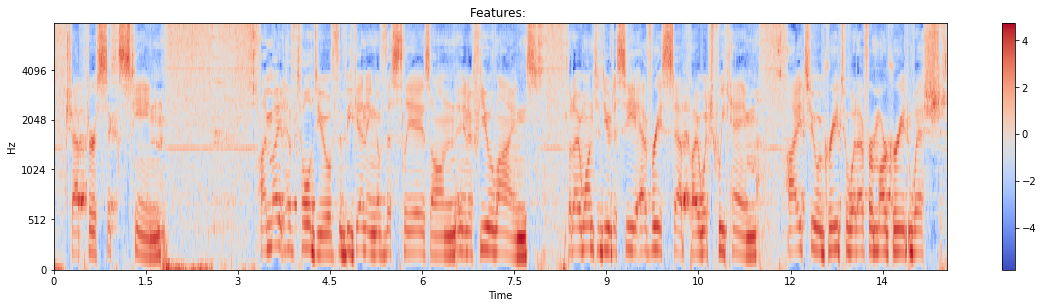

In [8]:
sample = next(it)
audio, token_seq =  sample['audio'], sample['token_seq']

_, original_seq = tokenizer.decode_tokens(token_seq)
features = frontend(audio)
features = features.numpy()[0]

fig = plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.gca().set_title('Features: ')

librosa.display.specshow(features,
                         x_axis='time', y_axis='mel', 
                         sr=sr, hop_length=hop_len)
plt.colorbar();
print(audio.shape[-1] / sr)